# <center><font color='brown'>An online household goods store</font></center>
<center><img src="household.jpg"></center>

## Contents<a class="anchor" id="contents"></a>

* [Project description](#Project_description)
<p> </p> 
* [Project stages](#Project_stages)
    * [1. Data preprocessing](#Part_1)
        * [Import the libraries](#part1step1)
        * [Import the data file and Identification of data types](#part1step2)
        * [Analysis of Statistical Summary of Numeric and Categorical Variables](#part1step3)
        * [Conclusion](#part1Conclusion)
    * [2. Exploratory data analysis](#Part_2)
        * [Missing values imputation](#part2step1)
        * [Checking for duplicates](#part2step2)
        * [Outlier treatment](#part2step3)
        * [Conclusion](#part2Conclusion)
    * [3. Categorization](#Part_3)
        * [Multiple names for the same codes](#part3step1)
        * [Unique product token](#part3step2)
        * [Categorization of goods](#part3step3)
        * [Analysis of product categories](#part3step4)
        * [Conclusion](#part3Conclusion)
    * [4. Hypothesis testing](#Part_4)
        * [Conclusion](#part4Conclusion)
    * [5. Working with business metrics and indicators](#Part_5)
        * [Total revenue](#part5step1)
        * [AOV - Average Order Value](#part5step2)
        * [Average Revenue Per User (ARPU)](#part5step3)
        * [How many invoices did the store's customers have on average?](#part5step4)
        * [Dashboard](#part5step5)
        * [Conclusion](#part5Conclusion)
<p> </p> 
* [General Conclusion](#General_Conclusion) 
<p> </p> 
* [Presentation](#Presentation) 
<p> </p> 
* [Dashboard](#Dashboard) 
<p> </p> 
* [References](#References)

## Project description <a class="anchor" id="Project_description"></a>

Our task is to analyze the assortment of an online homegoods store. <br>
The analysis is performed for the product managers of the store.<br>

As for the product range analysis, managers of the store are most concerned about the following things:
- Which products are more often sold by themselves, and which ones are more often combined with others (main and additional assortment)?
- What product groups are more often included in the additional assortment?
- What bundles of product groups are often present in shopping carts? For example, the category "houseplants" can often be accompanied by "mineral fertilizers"

The store has provided a file with the history of transactions.

## Project stages <a class="anchor" id="Project_stages"></a>

## 1. Data preprocessing <a class="anchor" id="Part_1"></a>
[Go back to the Contents](#contents)

The first step here is looking at the content of the data file.<br>
Let's load the data and do an initial inspection.

### *Step 1:* Import the libraries <a class="anchor" id="part1step1"></a>

In [1]:
#packages for data manipulations
import pandas as pd
import numpy as np
#The Natural Language Toolkit
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
#statistical package
import math
import scipy.stats as stats
#packages for data plotting
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

### *Step 2:* Import the data file and Identification of data types <a class="anchor" id="part1step2"></a>

Let's do a primary data transformation to reduce the size of data frames in memory.

- **ecommerce_dataset_us.csv file**

In [2]:
#source of the data
#check memory usage
#df = pd.read_csv("ecommerce_dataset_us.csv", nrows=500)
#df.info(memory_usage='deep')

#add '/datasets/'
df_store = pd.read_csv("/datasets/ecommerce_dataset_us.csv", sep='\t'
                       , parse_dates=['InvoiceDate'], dtype={'Quantity':'int'})
#structure of the dataset
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int32         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), object(3)
memory usage: 26.9+ MB


The file *ecommerce_dataset_us.csv* contains the following columns:
- *InvoiceNo*   — order identifier
- *StockCode*   — item identifier
- *Description* — item name
- *Quantity*    — quantity of goods
- *InvoiceDate* — order date
- *UnitPrice*   — price per item
- *CustomerID*  — customer identifier

In [3]:
#dataset content
df_store.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
223721,556489,21326,AGED GLASS SILVER T-LIGHT HOLDER,1,2019-06-10 13:59:00,0.65,14704.0
44000,540154,79144C,PAINTED LIGHTBULB RAINBOW DESIGN,3,2019-01-03 11:30:00,0.84,NaN
316610,564755,22280,POCKET BAG PINK PAISELY BROWN SPOT,1,2019-08-28 10:31:00,2.46,NaN
409712,572069,85049A,TRADITIONAL CHRISTMAS RIBBONS,12,2019-10-18 13:24:00,1.25,14911.0
72657,542255,22873,NUMBER TILE COTTAGE GARDEN 5,1,2019-01-24 16:43:00,4.13,NaN
387136,570258,21328,BALLOONS WRITING SET,1,2019-10-08 09:56:00,3.29,NaN
66649,541810,84519B,CARROT CHARLIE+LOLA COASTER SET,1,2019-01-19 15:00:00,5.79,NaN
462515,575978,23472,NINE DRAWER OFFICE TIDY,6,2019-11-11 13:27:00,12.50,15903.0
263293,559981,23301,GARDENERS KNEELING PAD KEEP CALM,6,2019-07-12 11:30:00,1.65,14562.0
320297,564974,22329,ROUND CONTAINER SET OF 5 RETROSPOT,1,2019-08-29 15:32:00,3.29,NaN


The file match the description.

### *Step 3:* Analysis of Statistical Summary of Numeric and Categorical Variables <a class="anchor" id="part1step3"></a>

Since the dataset contains text fields that we need for analysis, let's translate them to uppercase.

In [4]:
df_store= df_store.apply(lambda x: x.str.upper() if x.dtype == "object" else x) 

Let's collect descriptive statistics of our data and see them in more detail.

In [5]:
#general statistic
df_store.describe(include='all', datetime_is_numeric=True)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000
unique,25900,3958,4206,NaN,NaN,NaN,NaN
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN
freq,1114,2380,2369,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,2019-07-02 13:34:57.156087040,4.611114,15287.690570
min,NaN,NaN,NaN,-80995.000000,2018-11-29 08:26:00,-11062.060000,12346.000000
25%,NaN,NaN,NaN,1.000000,2019-03-26 11:34:00,1.250000,13953.000000
50%,NaN,NaN,NaN,3.000000,2019-07-17 17:17:00,2.080000,15152.000000
75%,NaN,NaN,NaN,10.000000,2019-10-17 11:27:00,4.130000,16791.000000
max,NaN,NaN,NaN,80995.000000,2019-12-07 12:50:00,38970.000000,18287.000000


Here we see the following:
- missing values in Description and CustomerID columns
- different number of unique values for StockCode and Description
- negative values in the Quantity and UnitPrice columns
- extra high values in the Quantity and UnitPrice columns
- InvoiceDate from 2018-11-29 to 2019-12-07

### Conclusion.<a class="anchor" id="part1Conclusion"></a>

The file received from the online store matches the description.<br>
It stores the history of transactions for customer accounts. We suppose that the data was collected automatically by a special accounting program that is available in the store. Data is generated for each "add to cart". The program also allows them to add transactions manually and account for cancellation or refund.

The dates in the files are converted to the DateTime type. <br>
The dataset contains missing values, outliers and possibly duplicate records.

## 2. Exploratory data analysis <a class="anchor" id="Part_2"></a>

[Go back to the Contents](#contents)

This stage is data transformation. We correct or remove missing,  irrelevant and noisy elements from the data and reduce their complexity.

### *Step 1:* Missing values imputation<a class="anchor" id="part2step1"></a>

In [6]:
def get_num_missing(data, v_field):
    #this function returns the percentage of missing data in the specified field
    ratio= data[v_field].isnull().sum() / data.shape[0]
    return print('Column <'+v_field+'>: Percentage of missing values: {:.1%}'.format(ratio))

We have missing data in the Description and CustomerID columns.

In [7]:
#percentage of missing data
get_num_missing(df_store,'Description')
get_num_missing(df_store,'CustomerID')

Column <Description>: Percentage of missing values: 0.3%
Column <CustomerID>: Percentage of missing values: 24.9%


First, let's look at the values in the CustomerID column.

It will be convenient for us to fill in the missing data with zero and convert the column to integer.

In [8]:
#fill missing data with 0
df_store['CustomerID'].fillna(0, inplace=True)
#change data type
df_store['CustomerID']= df_store['CustomerID'].astype('int')

Then we will search for CustimerID through the invoice number.

In [9]:
#invoices with missing CustomerID values
df_invoice= df_store[df_store['CustomerID']==0][['InvoiceNo']].drop_duplicates()
#invoices with CustomerID values
df_customer= df_store[df_store['CustomerID']!=0].groupby('InvoiceNo').agg({'CustomerID':'unique'})
df_customer['CustomerID']= df_customer['CustomerID'].astype('int')
#join
df= pd.merge(df_invoice, df_customer, left_on='InvoiceNo', right_index=True)
print('Found values:', df.shape[0])

Found values: 0


The dataset contains 24% of records without a CustomerID. Therefore, we will not take this field into account in further analysis.<br>

Let's check the missing descriptions. Although there are only 0.3% missing values, this field is significant in our analysis.<br> We will search descriptions through the StockCode.

In [10]:
#StockCode with missing Description
df_code= df_store[df_store['Description'].isnull()==True][['StockCode']].drop_duplicates()
#StockCode with Description
df_customer= df_store[df_store['Description'].isnull()==False].groupby('StockCode').agg({'Description':'first'})
#join
df= pd.merge(df_code, df_customer, left_on='StockCode', right_index=True)
print('Found values:', df.shape[0])

Found values: 850


Let's fill the missing descriptions in.

In [11]:
#update Description
df_store.update(df['Description'], overwrite=False)

In [12]:
#percentage of missing data
get_num_missing(df_store,'Description')

Column <Description>: Percentage of missing values: 0.1%


Fill the rest of the values with a dummy value.

In [13]:
#fill missing data with ?
df_store['Description'].fillna('?', inplace=True)

### *Step 2:* Checking for duplicates <a class="anchor" id="part2step2"></a>

In [14]:
#checks for duplicates
ratio= (df_store.shape[0]-df_store.drop_duplicates().shape[0]) / df_store.shape[0]
print('Percentage of duplicated rows: {:.2%}'.format(ratio))

Percentage of duplicated rows: 0.97%


The percentage of duplicate entries is insignificant, we can delete them.

In [15]:
df_store.drop_duplicates(inplace=True)
print("Total rows in the dataset:", df_store.shape[0])

Total rows in the dataset: 536641


We saw earlier that the number of unique records in StockCode and Description columns do not match. Let's check them.

In [16]:
df_store[['StockCode','Description']].describe()

,StockCode,Description
count,536641,536641
unique,3958,4206
top,85123A,WHITE HANGING HEART T-LIGHT HOLDER
freq,2368,2357


I think that the online store changed the text of the product description.<br>
We will take this into account later, at the stage of categorizing the list of products in the store.

### *Step 3:* Outlier treatment <a class="anchor" id="part2step3"></a>

We have explicit outliers in the Quantity and UnitPrice columns. Let's see the distribution of data in them.

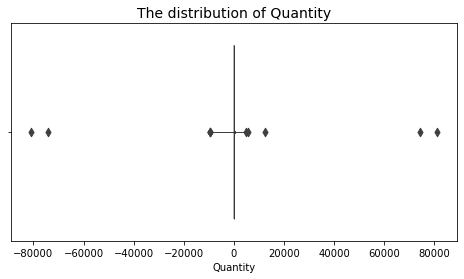

In [17]:
#whisker plot of Quantity
plt.figure(figsize=(8,4))
ax = sns.boxenplot(x=df_store['Quantity']).set_title("The distribution of Quantity", size=14);

Based on the content of the data, negative values in the dataset indicate accounting amendments. Obviously, there are such corrections in data with positive values.<br>
This should be taken into account when calculating business metrics.

Let's see the distribution of data in the UnitPrice column.

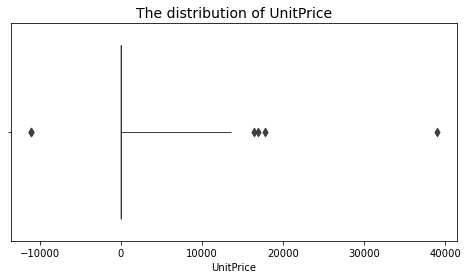

In [18]:
#whisker plot of UnitPrice
plt.figure(figsize=(8,4))
ax = sns.boxenplot(x=df_store['UnitPrice']).set_title("The distribution of UnitPrice", size=14);

Analyzing the data, we can say that for the task of categorizing goods, these emissions do not matter. However, when calculating business metrics, these outliers can affect the resulting values. Therefore, we will remove them at the stage of calculating the metrics.

### Conclusion. <a class="anchor" id="part2Conclusion"></a>
To summarize, we filled in the missing values and removed the duplicates in the dataset.
For further analysis, it should be taken into account that the dataset contains 24% of records with a CustomerID equal to zero. In connection with Quantity and UnitPrice columns, this field indicates accounting adjustments.<br>
Also, we have a number of records filled with dummy value, which must be taken into account when categorizing store products.

## 3. Categorization <a class="anchor" id="Part_3"></a>
[Go back to the Contents](#contents)

To categorize the assortment, we will create a separate dataframe with product descriptions.

### *Step 1:* Multiple names for the same codes <a class="anchor" id="part3step1"></a>

As we saw above, product codes have different names. Let's bring them to the same names to simplify categorization.

In [19]:
#full assortiment
df_items= df_store[['StockCode','Description']].drop_duplicates()
print('Number of unique product descriptions', df_items.shape[0] )

Number of unique product descriptions 5094


Product names containing less than 8 characters are accounting amendments, we do not need them here.

In [20]:
#remove words less than 8 characters
df_items= df_items[df_items['Description'].str.len()>8].reset_index()

Find product codes with different names.

In [21]:
#group by StockCode
df_dubl_descrpt= df_items.groupby('StockCode').agg({'Description':'nunique'}).reset_index()
df_dubl_descrpt= df_dubl_descrpt[df_dubl_descrpt['Description']>1][['StockCode']]
print('StockCode with multiple names', df_dubl_descrpt.shape[0])

StockCode with multiple names 349


Let's choose the correct name for the code.

In [22]:
#collect all the names 
df_dubl_descrpt= df_dubl_descrpt.merge(df_items, left_on='StockCode', right_on='StockCode')

In [23]:
#unnecessary names
list_of_values=['THROWN AWAY','THROW AWAY','WET DAMAGED','ADJUSTMENT','ASSORTED','DESTROYED','YOU',
                'RE-ADJUSTMENT','WET/RUSTY','STOCK CHECK','CRUSHED BOXES', 'AND','WITH','AIRMAIL',
                'AMAZON FEE','ADJUST BAD DEBT','BANK CHARGES','CRUK COMMISSION','DOTCOM POSTAGE','BANK CHARGES']

In [24]:
#StockCodes with corrected names
df1= df_dubl_descrpt[df_dubl_descrpt['Description'].str.len()>10]\
                    .query("Description not in @list_of_values")\
                    .groupby('StockCode').agg({'Description':'first'}).reset_index()

The final list of products.

In [25]:
#full assortiment
assortiment= df_items.loc[~df_items['StockCode'].isin(df1['StockCode']), ['StockCode','Description']
            ].append(df1[['StockCode','Description']])
print('Number of unique product descriptions', assortiment.shape[0] )

Number of unique product descriptions 3840


In [26]:
#remove the remaining accounting amendments
assortiment= assortiment.query("Description not in @list_of_values").reset_index()
#final dataset
assortiment.head()

,index,StockCode,Description
0,3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
1,4,84029E,RED WOOLLY HOTTIE WHITE HEART.
2,5,22752,SET 7 BABUSHKA NESTING BOXES
3,6,21730,GLASS STAR FROSTED T-LIGHT HOLDER
4,7,22633,HAND WARMER UNION JACK


### *Step 2:* Unique product token <a class="anchor" id="part3step2"></a>

To categorize products, we need to remove punctuation, plurals and numbers from the description.<br>
Also, we need to highlight one word from the description that will denote a category. Analyzing the data, it can see that the keyword is last in the description. Let's take advantage of this feature.

In [27]:
#Lemmatize using WordNet's built-in morphy function
wordnet_lemmatizer = WordNetLemmatizer()

In [28]:
def correct_words(row):
    #this function rebuilds Description and found Token of product item
    sentence = row['Description']
    new_sentence=''
    token=''
    #extra characters
    punctuations="?:!.,;"
    
    #divided the sentence into words
    sentence_words = nltk.word_tokenize(sentence)
    for word in sentence_words:
        #removal of punctuation
        if word in punctuations:
            sentence_words.remove(word)
        #removal of small words, numbers, plural    
        new_word= wordnet_lemmatizer.lemmatize(word.lower(), pos="n")
        if (len(new_word)>2)&(any(map(str.isdigit, new_word))==False ):
            token= new_word.upper()
            new_sentence= new_sentence+' '+token
            
    #return a new Description and Token       
    return pd.Series((new_sentence, token)) 

In [29]:
#a new Description
assortiment[['NewDescription','Token']]= assortiment.apply(correct_words, axis=1)
#print result
print('Total number of unique tokens', assortiment['Token'].drop_duplicates().shape[0])

Total number of unique tokens 729


To summarize, we got 736 unique token attributes out of 3840 unique product names.

In [30]:
assortiment.head()

,index,StockCode,Description,NewDescription,Token
0,3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,KNITTED UNION FLAG HOT WATER BOTTLE,BOTTLE
1,4,84029E,RED WOOLLY HOTTIE WHITE HEART.,RED WOOLLY HOTTIE WHITE HEART,HEART
2,5,22752,SET 7 BABUSHKA NESTING BOXES,SET BABUSHKA NESTING BOX,BOX
3,6,21730,GLASS STAR FROSTED T-LIGHT HOLDER,GLASS STAR FROSTED T-LIGHT HOLDER,HOLDER
4,7,22633,HAND WARMER UNION JACK,HAND WARMER UNION JACK,JACK


### *Step 3:* Categorization of goods <a class="anchor" id="part3step3"></a>

For further analysis of product categories, it will be convenient to transfer tokens to a main dataset.

In [31]:
#add column Token to the basic dataset
df_store= df_store.merge(assortiment[['StockCode','Token']], left_on='StockCode', right_on='StockCode'
                         , how='outer')

Сollecting a dataset of goods that have been sold.

In [32]:
#certain goods
df_sell_items= df_store[(df_store['CustomerID']>0)&(df_store['UnitPrice']>0)&(df_store['Quantity']>0)
         &(df_store['Token'].isnull()==False)]

Let's look at the distribution of the store assortment by tokens.

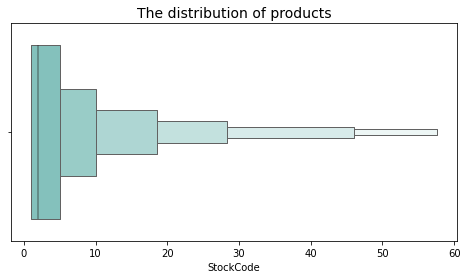

In [33]:
#group by Token
df= df_sell_items.groupby('Token').agg({'StockCode':'nunique'})

plt.figure(figsize=(8,4))
#whisker plot with hidden outlier points
ax = sns.boxenplot(x=df["StockCode"], palette="GnBu", showfliers=False
                  ).set_title("The distribution of products", size=14);

Boxplot shows us that tokens contain mainly 1 to 5 products. The Average number of products is 2.

**Let's divide the entire set of products into two categories: basic products and additional products.**

The basic product category is products with the same token that are sold individually or together with each other. The rest of the products are additional assortment.

In [34]:
#count all tokens
df_count_invoices= df_sell_items.groupby('InvoiceNo').agg({'Token':'nunique'})
df_count_invoices.columns=['Count']

In [35]:
#invoices with a single token
df_single_item= df_count_invoices[df_count_invoices['Count']==1]\
                                 .merge(df_sell_items[['InvoiceNo','Token']], 
                                  left_index=True, right_on='InvoiceNo')

Let's assign categories to products. Here, **1** is the main products, **2** is an additional assortment.

In [36]:
#assign 1 to the main product category
df_sell_items= df_sell_items.merge(df_single_item[['Token','Count']].drop_duplicates()
                                   , left_on='Token'
                                   , right_on='Token'
                                   , how='outer').reset_index(drop=True)
#assign 2 to the additional assortment
df_sell_items['Count'].fillna(2, inplace=True)
df_sell_items.rename(columns={'Count': 'Category'}, inplace=True)

Visualization of the percentage of product categories.

In [37]:
def make_plot_pie(title, colors):
    #this function builds a pie chart by params
    #donut pie chart
    ax= plt.pie(df, colors=colors, 
                pctdistance=0.5, autopct='%1.1f%%', textprops=dict(weight="bold"),
                wedgeprops = {'linewidth': 6, 'edgecolor':'white'})
    plt.title(title, size=14); 
    #donut hole
    my_circle = plt.Circle((0,0), 0.3, color='white')
    p = plt.gcf() 
    p.gca().add_artist(my_circle)

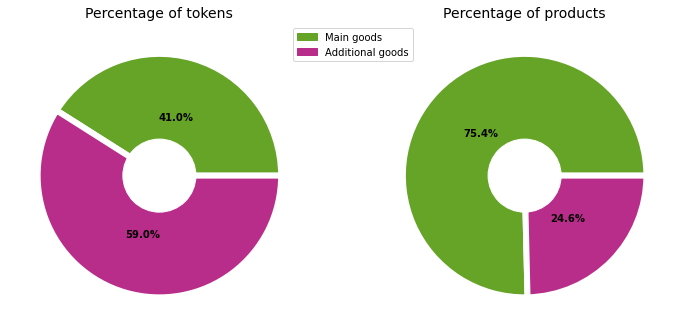

In [38]:
plt.figure(figsize=(12,7))

#pie chart Tokens
#prepare the dataset for plotting
df= df_sell_items.groupby('Category').agg({'Token':'nunique'})['Token']
#plot
plt.subplot(1,2,1)
in_colors = ["#66a428", "#b92d8a"]
in_title='Percentage of tokens'
make_plot_pie(in_title, in_colors)
#legend
green_patch= mpatches.Patch(color="#66a428", label='Main goods')
red_patch= mpatches.Patch(color="#b92d8a", label='Additional goods')
plt.legend(handles=[green_patch, red_patch], loc=1, bbox_to_anchor=(1.35, 1))

#pie chart Category
#dataset
df= df_sell_items.groupby('Category').agg({'StockCode':'nunique'})['StockCode']
#plot
plt.subplot(1,2,2)
in_title='Percentage of products'
make_plot_pie(in_title, in_colors)

plt.show()

As we can see in the graph, the store's products are distributed as follows:
- the main category of goods has a smaller number of tokens, while they combine a larger number of product names.
- the additional category contains a larger number of tokens, but at the same time it is composed for a smaller number of products.

### *Step 4:* Analysis of product categories <a class="anchor" id="part3step4"></a>

In this step, we will consider the resulting categories in more detail.

**- Which products are more often sold by themselves, and which ones are more often combined with others (main and additional assortment)?**

Let's take a look at the top selling products in the main and additional categories.

In [39]:
def make_plot_items(num, title, color):
    #this function make horizontal bar graph by params
    #dataset
    df= (df_sell_items[df_sell_items['Category']==num].groupby('Description')
                                                      .agg({'Category':'count'})
                                                      .sort_values('Category', ascending=False) 
         ).rename(columns={'Category':'Count'})
    df['Percentage']= df.apply(lambda x: round(x['Count']/df.shape[0]*100, 2), axis=1)
    #plotting
    #params
    fig = plt.figure(figsize = (13, 4))
    ax = fig.add_subplot()
    ax.set_title(title, fontdict={'size':15});
    ax.set_xlabel('Percentage of all products in the category');
    x= df.index[0:10]
    y= df['Percentage'].head(10)
    #barplot graph
    ax.barh(x, y, color = color, alpha = 0.4);

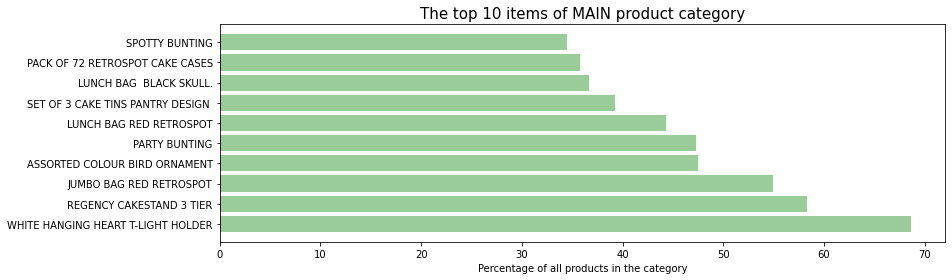

In [40]:
#main product category
make_plot_items(1, 'The top 10 items of MAIN product category','green')

WHITE HANGING HEART T-LIGHT HOLDER's sale is about 70% of all main category products.

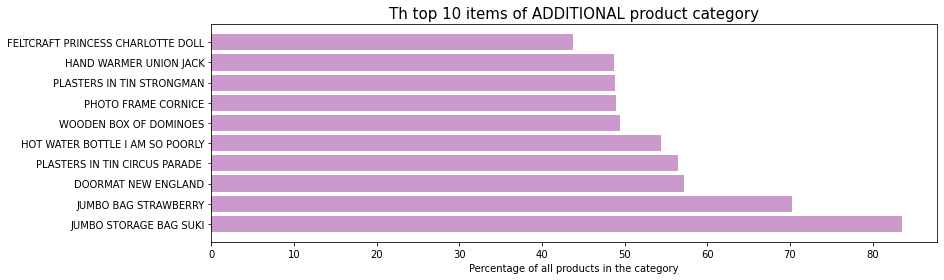

In [41]:
#ADDITIONAL product category
make_plot_items(2, 'Th top 10 items of ADDITIONAL product category','purple')

The most popular item in the additional product category is JUMBO STORAGE BAG SUKI. Its sales are over 85% of all products in this category.

**- What product groups are more often included in the assortment?**

A sample of 10 tokens containing the largest number of products.

In [42]:
#main goods
df_main10= df_sell_items[df_sell_items['Category']==1].groupby('Token')\
                                                      .agg({'StockCode':'nunique'})\
                                                      .sort_values('StockCode', ascending=False).head(10)

#additional goods
df_addit10= df_sell_items[df_sell_items['Category']==2].groupby('Token')\
                                                      .agg({'StockCode':'nunique'})\
                                                      .sort_values('StockCode', ascending=False).head(10)
#merge datasets for plotting
df= pd.concat([df_main10, df_addit10], axis=0)

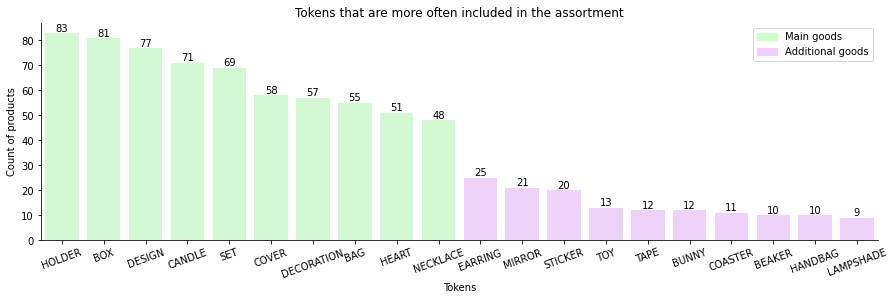

In [43]:
#plotting
fig, ax1 = plt.subplots(figsize=(15, 4))
#two colors for graph
colors = ['#ccffcc' if c>25 else '#f2ccff' for c in df['StockCode']]
#barplot
ax = sns.barplot(x=df.index, y=df['StockCode'], palette=colors, ax=ax1);

#annotation of bar labels
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()), 
                    ha='center', va='bottom', color= 'black')
ax.set(title='Tokens that are more often included in the assortment', ylabel='Count of products', xlabel='Tokens');
plt.xticks(rotation=20);
#legend
green_patch = mpatches.Patch(color='#ccffcc', label='Main goods')
red_patch = mpatches.Patch(color='#f2ccff', label='Additional goods')
plt.legend(handles=[green_patch, red_patch])

sns.despine(fig);

Products from the Holder, Box and Design product groups are most commonly found in the basic product category.<br>
In the category of additional products, the leading products from the groups Earrings, Mirror and Stickers.

**- What bundles of product groups are often present in shopping carts?**

Let's check the goods in the invoices and find the most common token pairs.

In [44]:
#group by Invoices
df= df_sell_items.groupby('InvoiceNo').agg({'Token':'unique'})
#count Tokens in Invoices
df['Count']= df.apply(lambda x: len(x['Token']), axis=1)
#more than one Token
df= df[df['Count']>1].reset_index()

In [45]:
def collect_pairs(arr):
    #selection of possible token pairs
    n= len(arr)
    #nested loop for pairs 
    for i in range(n): 
        for j in range(n): 
            if (arr[i] < arr[j]):
                rows_list.append([arr[i],arr[j]])

In [46]:
#list of token pairs
rows_list= []
#fill the list
c= df.apply(lambda x: collect_pairs(x['Token']), axis=1 )
df_pair= pd.DataFrame(rows_list, columns=[['p1','p2']])

#the top 20 of token pairs
df_top= df_pair.value_counts().head(20).to_frame().reset_index()
df_top.columns=['Group1','Group2','Count']
#dataframe styling
df_top.style.set_caption('Bundles of product tokens').background_gradient(cmap='GnBu')

,Group1,Group2,Count
0,DESIGN,RETROSPOT,3948
1,BOX,DESIGN,3359
2,DESIGN,HOLDER,3313
3,DESIGN,SET,2552
4,BAG,DESIGN,2513
5,DESIGN,HEART,2479
6,BOX,RETROSPOT,2409
7,CASE,DESIGN,2348
8,HOLDER,RETROSPOT,2343
9,BOX,HOLDER,2232


### Conclusion. <a class="anchor" id="part3Conclusion"></a>

At this stage, we have separated the dataset with product names and tried to remove accounting amendments from it. Then the names of the goods were unified. We divided the goods into groups and assigned tokens to each group. We also divided the products into two categories: main and additional.<br>
In summary, we can say that the dataset has 736 unique token attributes. Of these, 41% are tokens of the main category, 59% belong to the additional category of goods in the online store. Moreover, most of the products are grouped into the main category. The additional category has fewer products, but the products are more varied.<br>
Various holders are the undoubted sales leader; earrings are more often chosen from the additional category.
Paired goods in invoices more often belong to the DESIGN group, they are paired with the RETROSPOT, BOX, HOLDER groups, etc.

## 4. Hypothesis testing <a class="anchor" id="Part_4"></a>

[Go back to the Contents](#contents)

The purpose of hypothesis testing is to determine whether there is enough statistical evidence in favor of a certain belief, or hypothesis, about a parameter.

Our task here will be to check this question:
- **Does the average income for main category differ from the average income for additional category?**

Firstly, we remove anomalies and outliers to improve the quality of further analysis.

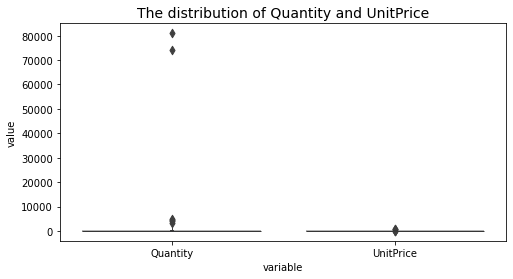

In [47]:
#whisker plots of Quantity and UnitPrice
plt.figure(figsize=(8,4))
sns.boxenplot(x="variable", y="value", data=pd.melt(df_sell_items[['Quantity','UnitPrice']])
             ).set_title("The distribution of Quantity and UnitPrice", size=14);

In [48]:
#filtered dataset
df_filtered= df_sell_items[(df_sell_items['Token']!='POSTAGE')&(df_sell_items['Quantity']<5000)
                          ][['Quantity','UnitPrice','Category']].reset_index()
df_filtered['Price']= df_filtered['Quantity']*df_filtered['UnitPrice']
df_filtered= df_filtered[(df_filtered['Price']<5000)].reset_index()

print("Total rows in the dataset:", df_filtered.shape[0])

Total rows in the dataset: 391147


The null hypothesis H₀ is always stated with an equal sign, so:<br>
H₀ - The average incomes for main category and additional category are the same.

The alternative hypothesis, H₁, is based on H₀, so:<br>
H₁ - The average incomes for main category and additional category are differ.

The significant level is the probability of rejecting the null hypothesis. I will use the significant level = 0.05, because a p-value less than 0.05 (typically ≤ 0.05) is statistically significant.

I will apply a scipy.stats.ttest_ind method. This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values.

In [49]:
def ttest(sample_1, sample_2, is_equal_var):
    #this function perform a standard independent 2 sample test
    # or Welch’s t-test, which does not assume equal population variance
    
    alpha = .05 #The significant level

    results = stats.ttest_ind(
            sample_1, 
            sample_2,
            equal_var= is_equal_var)

    #if the p-value is less than alpha, we reject the hypothesis
    print('p-value: ', results.pvalue)
 
    if (results.pvalue < alpha):
        print("We reject the null hypothesis")
    else:
        print("We can't reject the null hypothesis")

In [50]:
#dataset of main category
df_1 = df_filtered.loc[(df_filtered['Category']==1)]['Price']
#dataset of additional category
df_2 = df_filtered.loc[(df_filtered['Category']==2)]['Price']

Let's determine the sample size.

In [51]:
#count sample size
sample_size_1 = df_1.count()
sample_size_2 = df_2.count()

if (sample_size_1 <= sample_size_2):
    sample_size= sample_size_1
else:
    sample_size= sample_size_2  
    
print('Sample size:', sample_size)
list_1 = df_1.sample(sample_size).tolist()
list_2 = df_2.sample(sample_size).tolist()

Sample size: 54600


Let's determine the variances.

In [52]:
#variance
var_1 = np.var(list_1)
var_2 = np.var(list_2)
print('Variance of average income for main category - ',var_1)
print('Variance of average income for additional category - ',var_2)

Variance of average income for main category -  4354.326056508742
Variance of average income for additional category -  3620.747887744038


In [53]:
if (var_1 == var_2):
    is_equal_variance = True  #perform a standard independent 2 sample test
else:    
    is_equal_variance = False #perform Welch’s t-test

#t-test
ttest( list_1, list_2, is_equal_variance)

p-value:  3.1155502408628406e-42
We reject the null hypothesis


The p-value shows less than 1% probability of a null hypothesis.

In [54]:
print('Average income of main category is', round(df_1.median(),1))
print('Average income of additional category is', round(df_2.median(),1))

Average income of main category is 12.6
Average income of additional category is 9.9


### Conclusion. <a class="anchor" id="part4Conclusion"></a>

So we got the result:
the difference between the income of the main category and the additional category is statistically significant.

## 5. Working with business metrics and indicators <a class="anchor" id="Part_5"></a>

[Go back to the Contents](#contents)

Key performance indicators (KPIs) and business metrics are like milestones on the road to online trading success. Monitoring them will help product managers measure progress towards their sales, marketing, and customer service goals.

The analytical report will show the following KPIs and metrics:

### Total revenue <a class="anchor" id="part5step1"></a>

Total revenue is the full amount of total sales of goods. 

In [55]:
#reduce dataset
df_storeItems= df_store[(df_store['Quantity']<5000)&(df_store['Quantity']>-5000)&\
              (df_store['UnitPrice']>0)&(df_store['UnitPrice']<10000)]\
              [['Quantity','UnitPrice','InvoiceDate','InvoiceNo','CustomerID']]

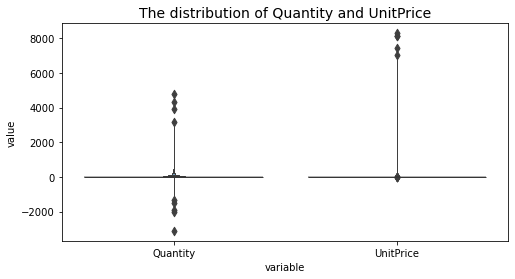

In [56]:
#whisker plots of Quantity and UnitPrice
plt.figure(figsize=(8,4))
sns.boxenplot(x="variable", y="value", data=pd.melt(df_storeItems[['Quantity','UnitPrice']])
             ).set_title("The distribution of Quantity and UnitPrice", size=14);

Adding several columns for subsequent calculations.

In [57]:
#month
df_storeItems['InvoiceMonth']= df_storeItems['InvoiceDate'].astype('datetime64[M]')
#price
df_storeItems['Price']= (df_storeItems['Quantity']*df_storeItems['UnitPrice'])

Total revenue by months.

In [58]:
#dataset
df_revenue= df_storeItems.groupby('InvoiceMonth')\
                         .agg({'Price':'sum','InvoiceNo':'nunique','CustomerID':'nunique'})

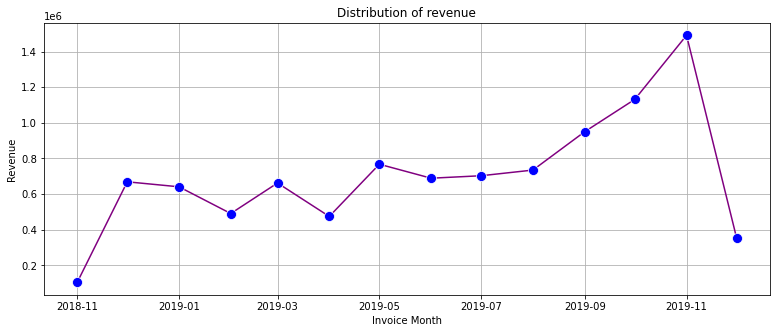

In [59]:
#line plot
plt.figure(figsize=(13,5))
plt.grid(True)
ax = (sns.lineplot(data=df_revenue, x="InvoiceMonth", y="Price", color='purple', 
              marker='o', markerfacecolor='blue', markersize=10));
ax.set(xlabel="Invoice Month", ylabel="Revenue", title='Distribution of revenue');

In [60]:
print('Average total online store revenue:',round(df_revenue['Price'].mean(),2) )

Average total online store revenue: 704721.47


The graph shows that until May 2019, total income fluctuated between 500,000 and 800,000, and then gradually increased and peaked in November 2019. The decrease in income after November 2019 may be due to incomplete data for analysis.

Next metric:

### AOV - Average Order Value <a class="anchor" id="part5step2"></a>

This is an ecommerce metric that refers to the average amount of money spent by customers per order.

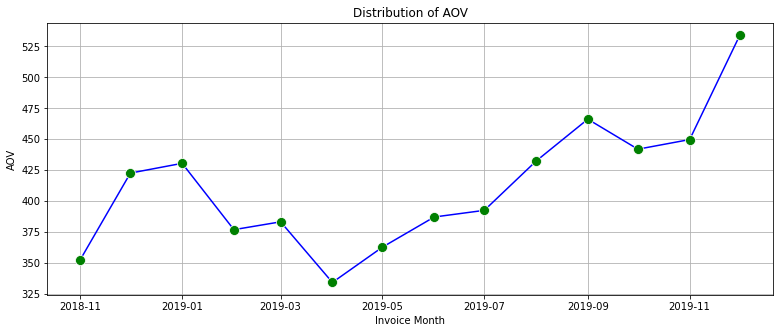

In [61]:
#Total Revenue ÷ Total No. of Orders = Average Order Value
df_revenue['AOV']= df_revenue['Price']/df_revenue['InvoiceNo']

#line plot
plt.figure(figsize=(13,5))
plt.grid(True)
ax = (sns.lineplot(data=df_revenue, x="InvoiceMonth", y="AOV", color='blue', 
              marker='o', markerfacecolor='green', markersize=10));
ax.set(xlabel="Invoice Month", ylabel="AOV", title='Distribution of AOV');

In [62]:
print('Average Order Value (AOV):',round(df_revenue['Price'].sum()/df_revenue['InvoiceNo'].sum(),2) )

Average Order Value (AOV): 414.87


From January 2019, we see a decrease in the average order amount up to April 2019. Since April 2019, there has been an increase in the order amount with a slight decrease in October and November.

Next metric:

### Average Revenue Per User (ARPU) <a class="anchor" id="part5step3"></a>

Average Revenue Per User is the average amount of monthly revenue that store receives per user.

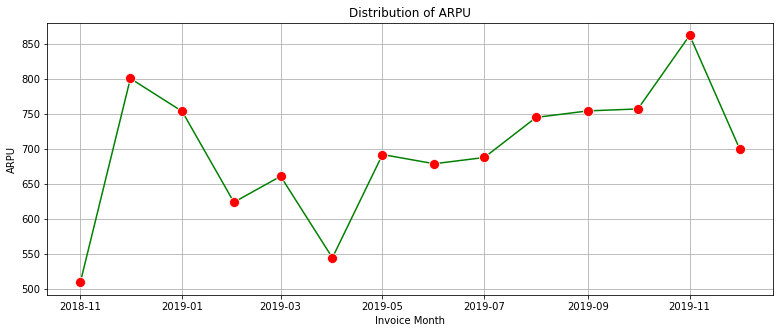

In [63]:
#Total Revenue ÷ Total No. of Customers = ARPU
df_revenue['ARPU']= df_revenue['Price']/df_revenue['CustomerID']

#line plot
plt.figure(figsize=(13,5))
plt.grid(True)
ax = (sns.lineplot(data=df_revenue, x="InvoiceMonth", y="ARPU", color='green', 
              marker='o', markerfacecolor='red', markersize=10));
ax.set(xlabel="Invoice Month", ylabel="ARPU", title='Distribution of ARPU');

In [64]:
print('Average Revenue Per User (ARPU):',round(df_revenue['Price'].sum()/df_revenue['CustomerID'].sum(),2) )

Average Revenue Per User (ARPU): 721.05


Since the beginning of the period under review, the Average amount of monthly revenue has decreased and until April 2019 has decreased by 1.5 times. Since April 2019, we have seen a positive increase in the metric value. From May 2019 to October 2019, ARPU was in the range of 700 to 750. In November 2019, the metric showed a positive jump up again.

### How many invoices did the store's customers have on average?<a class="anchor" id="part5step3"></a>

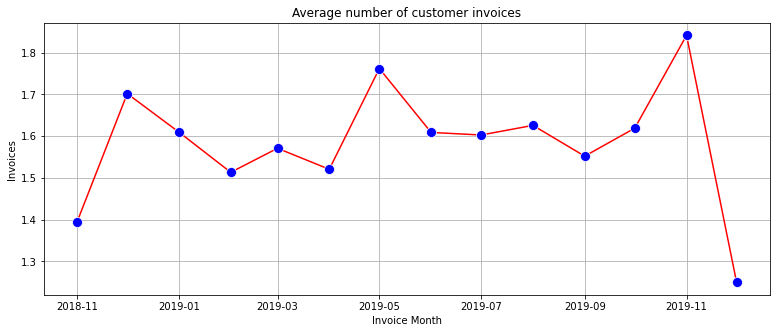

In [65]:
#dataset
df= (df_storeItems[df_storeItems['CustomerID']>0].groupby(['InvoiceMonth','CustomerID'])\
                                                .agg({'InvoiceNo':'nunique'})).groupby(level=0).mean()
#line plot
plt.figure(figsize=(13,5))
plt.grid(True)
ax = (sns.lineplot(data=df, x="InvoiceMonth", y="InvoiceNo", color='red', 
              marker='o', markerfacecolor='blue', markersize=10));
ax.set(xlabel="Invoice Month", ylabel="Invoices", title='Average number of customer invoices');

In [66]:
print('Average number of customer invoices:', round(df['InvoiceNo'].mean(),2) )

Average number of customer invoices: 1.58


On average, store customers have more than one invoice.

### Dashboard <a class="anchor" id="part5step5"></a>
The following parameters is showed using a dashboard in Tableau:<br>
**Pane 1 - Categories<br>
Pane 2 - Groups (Tokens)<br>
Pane 3 - Items<br>
Pane 4 - Total revenue<br>
Pane 5 - Average Revenue Per User<br>
Pane 6 - Average Order Value**

The values can be viewed in a breakdown of months.

Datasets for the dashboard.

In [67]:
#all products
df= df_sell_items[['StockCode','Description','InvoiceDate','Token','Category']].copy()
df['InvoiceMonth']= df['InvoiceDate'].astype('datetime64[M]')
#reduce dataset
df1 = df[(df['InvoiceMonth']>'2018-12-01')&(df['InvoiceMonth']<'2019-12-01')]\
  [['StockCode','Description','InvoiceMonth','Token','Category']]
df2= df1.groupby(['StockCode','Description','InvoiceMonth','Token','Category']).agg({'StockCode':'count'})
df2.columns=['Count']
df2.reset_index(inplace=True)
#save dataset to csv file
#df2.to_csv("sold_items.csv")

In [68]:
#KPI metrics
df= df_revenue.reset_index()
#reduce dataset
df2=df[(df['InvoiceMonth']>'2018-12-01')&(df['InvoiceMonth']<'2019-12-01')].reset_index(drop=True)
#save dataset to csv file
#df2.to_csv("metrics.csv")

### Conclusion <a class="anchor" id="part5Conclusion"></a>

Summing up, we can say that the KPIs and metrics of this online store show that over the period under review, total income has increased significantly since April 2019. The average amount of money spent by customers per order has also increased.<br>
The average amount of monthly revenue that store receives per user dropped significantly until April 2019. Then it not only returned to its previous value, but increased.<br>
The average number of invoices greater than one indicates that users are returning to the store.

## General Conclusion<a class="anchor" id="General_Conclusion"></a>
[Go back to the Contents](#contents)

The online household goods store provided a file with transactions carried out by the store's customers and accounting. Customer data is an invoice data about purchases made. The accounting data contains the corrections they made, such as refund, postage, etc.<br> 
The file contains historical data from December 2018 to December 2019. The total of records in the file is 541,909.

The dataset contained some unacceptable data that was filled in or deleted. The dataset contains 24% of records without a CustomerID which contains accounting transactions. We left them in the dataset to correctly calculate the total income. However, these rows were excluded at the stage of categorizing store products, as well as when calculating the average number of invoices per customer.

All products of the store were divided into groups and each group was assigned a label (token). The resulting groups were divided into two categories: the main assortment of the store and additional products.

The dataset contains 736 unique product groups. Of these, 41% are tokens of the main category, 59% belong to the additional category of goods.<br>
The number of products in the main category is higher than in the groups of the additional category.

Various holders are the sales leader; earrings are more often chosen from the additional category.
Paired goods in invoices more often belong to the DESIGN group, they are paired with the RETROSPOT, BOX, HOLDER groups, etc.

The analysis of income by category showed that the difference between the income of the main category and the additional category is statistically significant.

When calculating KPIs, we saw that online store metrics showed a significant drop until April 2019. And then a significant increase until the end of the period under review. Perhaps there were marketing campaigns in April that led to positive results.

In general, the online store is showing positive dynamics. The basic profit comes from products of the main category. Products of the Design group are more often combined with other products.

## Presentation  <a class="anchor" id="Presentation"></a>

The final result of the analysis is presented in the form of <a href="https://drive.google.com/file/d/1ChZRpUAKm5oUtMW2XdQ1w9lbgInIuVEP/view?usp=sharing">a PDF file</a> and contains visualization and conclusions on stages of the analysis.

## Dashboard  <a class="anchor" id="Dashboard"></a>

The Tableau dashboard: <a href="https://public.tableau.com/profile/luba.sheynin#!/vizhome/HomegoodsOnlineStore2019/OnlineStore">HomegoodsOnlineStore2019</a> 

## References  <a class="anchor" id="References"></a>
1. <a href="https://www.oberlo.com/blog/key-performance-indicators-kpis">6 CRUCIAL ECOMMERCE KEY PERFORMANCE INDICATORS (KPIS) TO TRACK</a>
2. <a href="https://thenextscoop.com/how-to-analyze-e-commerce-data/">How to Analyze Your E-commerce Data</a>
3. <a href="https://hackr.io/blog/what-is-data-analysis-methods-techniques-tools">What is Data Analysis? Methods, Techniques & Tools</a>
4. <a href="https://medium.com/@babagee500/hypothesis-testing-in-an-e-commerce-business-1025bdab1f1d">Hypothesis Testing in an E-commerce Business</a>

[Go back to the Contents](#contents)